In [1]:
import pandas as pd

C:\Users\anant\AppData\Local\Temp\ipykernel_6176\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read the CSV file
Books = pd.read_csv('booksData.csv')
Books

,Name,NOR,Rating,YOP,Shelf,Page,Genre
0,Harry Potter And The Sorcerer's Stone,9874966,4.47,2003,read,309,fiction
1,1984,4506321,4.19,1949,read,368,fiction
2,Harry Potter And The Prisoner Of Azkaban,4094304,4.58,2004,read,435,fiction
3,Harry Potter And The Chamber Of Secrets,3850554,4.43,1999,read,341,fiction
4,Animal Farm,3813290,3.98,1945,read,141,fiction
...,...,...,...,...,...,...,...
142,Logic Made Easy,416,3.43,2004,to-read,256,non-fiction
143,The 10 Rules Of Successful Nations,379,4.04,2020,to-read,256,non-fiction
144,Poetry For Dummies,204,3.73,2001,on-hold,336,non-fiction
145,"Less But Better / Weniger, Aber Besser",90,4.30,2021,to-read,154,non-fiction


In [3]:
# We first determine the value of Default Rating by finding the sample median

# Choose the desired percentile for R
percentile_value = 20  # Being a little pissimistic about the median value

R = Books['Rating'].quantile(percentile_value / 100)
print("Median Rating:", R)

C = Books['NOR'].mean()
W = C / 40 # Now we find Worth of the Default Rating
print("Worth:", W)

Median Rating: 3.904
Worth: 14480.036564625849


In [4]:
# Find the Book Value by an algo discussed here: https://stackoverflow.com/a/50476254/14224859
# Calculating Book Value
Books['BV'] = (((W * R) + (Books['NOR'] * Books['Rating'])) / (W + Books['NOR'])) * 2

# Truncating to two decimal points
Books['BV'] = (Books['BV'] * 10**2).astype(int) / 10**2

# Add bins to BV value
Books['BV_bin'] = Books['BV'].apply(lambda x: '> 8' if x > 8 else '< 8')

# Sorting based on BV (Book Value) in descending order
Books = Books.sort_values(by='BV', ascending=False)
Books

,Name,NOR,Rating,YOP,Shelf,Page,Genre,BV,BV_bin
2,Harry Potter And The Prisoner Of Azkaban,4094304,4.58,2004,read,435,fiction,9.15,> 8
43,Project Hail Mary,529819,4.51,2021,read,476,fiction,8.98,> 8
0,Harry Potter And The Sorcerer's Stone,9874966,4.47,2003,read,309,fiction,8.93,> 8
56,Shoe Dog,289070,4.47,2016,to-read,400,non-fiction,8.88,> 8
3,Harry Potter And The Chamber Of Secrets,3850554,4.43,1999,read,341,fiction,8.85,> 8
...,...,...,...,...,...,...,...,...,...
111,How To Talk To Anyone,34009,3.72,2003,on-hold,345,non-fiction,7.54,< 8
62,The Wife Upstairs,250859,3.74,2021,to-read,290,fiction,7.49,< 8
115,The Girl In Room 105,22068,3.57,2018,read,304,fiction,7.40,< 8
104,Uncommon Type,43802,3.43,2017,to-read,405,fiction,7.09,< 8


In [5]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

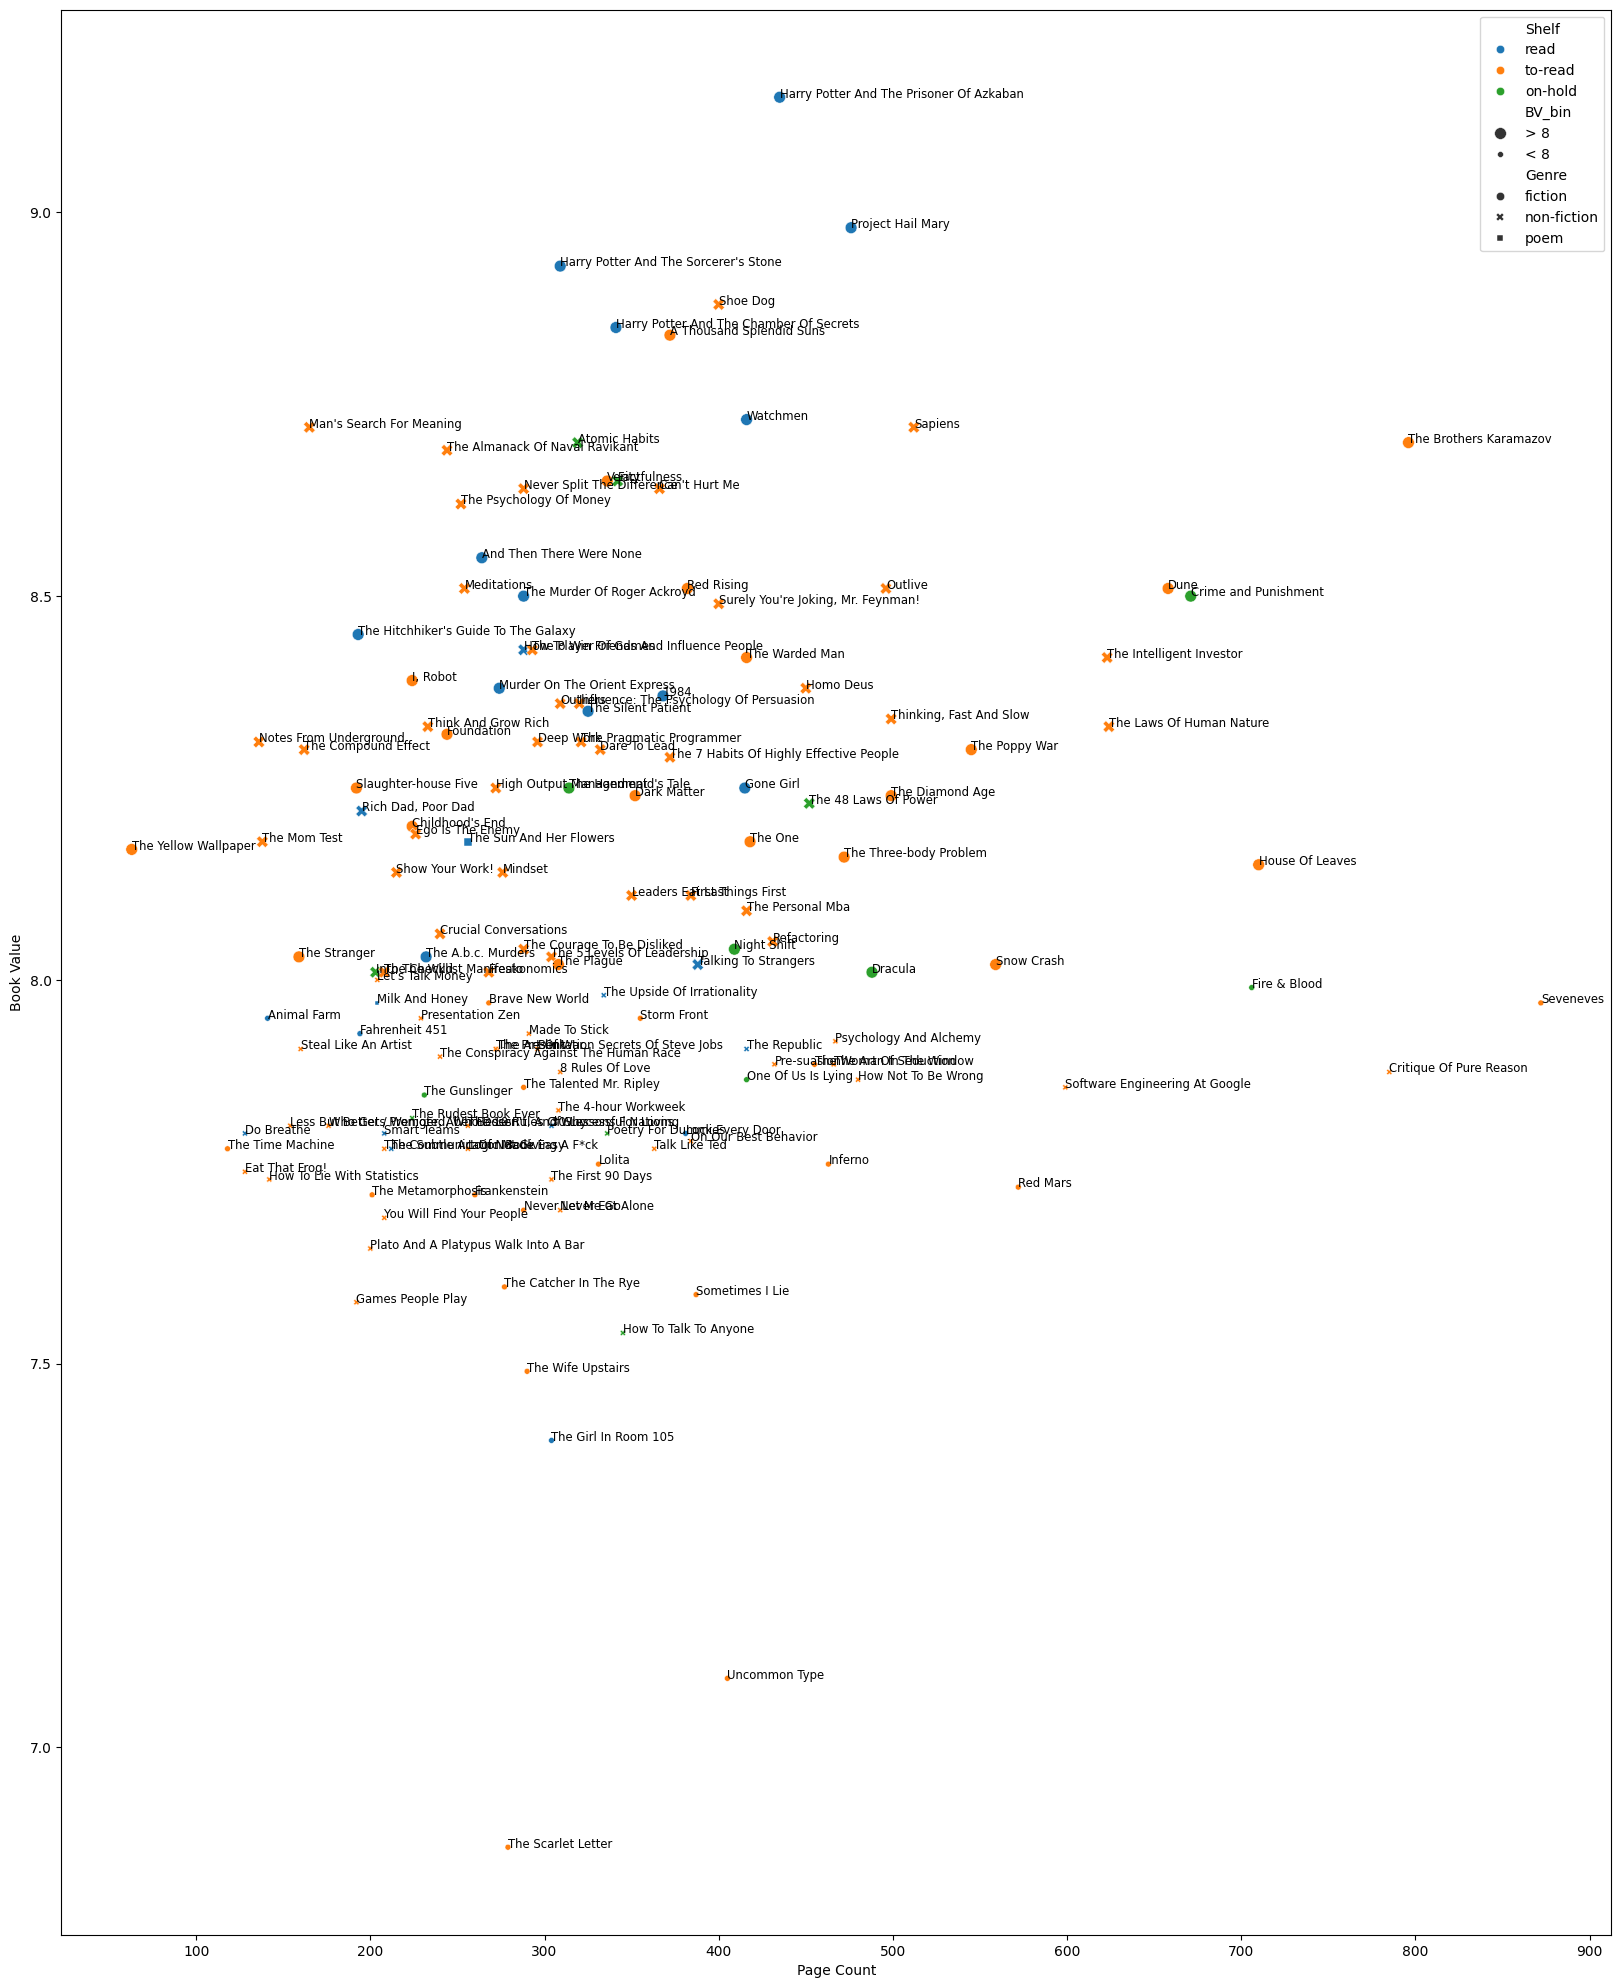

In [6]:
# Plotting the graph of Book Value vs Page Count
plt.figure(figsize=(20, 25))

sns.scatterplot(data=Books, x='Page', y='BV', hue='Shelf', style='Genre', size='BV_bin')

# Adding text labels
for line in range(0, Books.shape[0]):
    plt.text(Books.Page[line], Books.BV[line], Books.Name[line], size='small')

# Adding labels
plt.xlabel('Page Count')
plt.ylabel('Book Value')
plt.legend()
plt.show()